In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\\DataSets\\Ecommerce Customers.xls")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.shape

(500, 8)

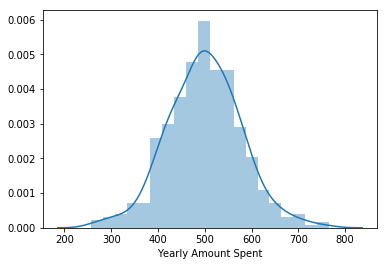

In [8]:
sns.distplot(df['Yearly Amount Spent'])

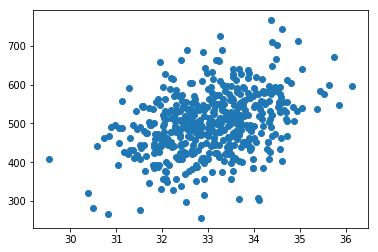

In [10]:
plt.scatter(y=df['Yearly Amount Spent'],x=df['Avg. Session Length'])

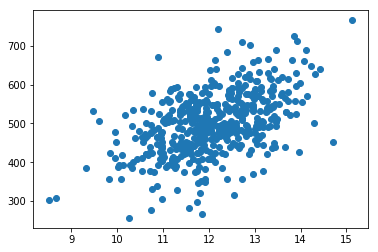

In [11]:
plt.scatter(y=df['Yearly Amount Spent'],x=df['Time on App'])

In [65]:
x=df.drop(['Email','Address','Yearly Amount Spent','Avatar'],axis=1)
y=df['Yearly Amount Spent'].values

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
model = LinearRegression()

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [69]:
lin_reg=LinearRegression()
model = lin_reg.fit(x_train,y_train)
print(f'R^2 score for train:{lin_reg.score(x_train,y_train)}')
print(f'R^2 score for test:{lin_reg.score(x_test,y_test)}')

R^2 score for train:0.9837380400055442
R^2 score for test:0.9861924261981548


In [71]:
y_pred = model.predict(x_train)
y_pred1 = model.predict(x_test)

In [72]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test,y_pred1)
print(mae)
mse =metrics.mean_squared_error(y_test,y_pred1)
print(mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print(rmse)

7.645674798915259
92.89010304498487
9.637951185028117


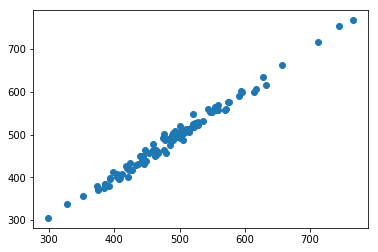

In [73]:
plt.scatter(y_test,y_pred1)

In [62]:
import statsmodels.api as sm


x_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

C:\Users\vikas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7766.
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:07:10   Log-Likelihood:                -1856.9
No. Observations:                 500   AIC:                             3724.
Df Residuals:                     495   BIC:                             3745.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Avg. Session Length     25.7343      0.451     57.057      0.000      24.848      26.620
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Pearson's correlation

In [91]:
cor=df.corr()

In [92]:
cor_target = abs(cor['Yearly Amount Spent'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

In [100]:
x1 = df[['Length of Membership']]
y1 =df['Yearly Amount Spent']

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=20)

In [102]:
lin_reg=LinearRegression()
model = lin_reg.fit(x_train,y_train)
print(f'R^2 score for train:{lin_reg.score(x_train,y_train)}')
print(f'R^2 score for test:{lin_reg.score(x_test,y_test)}')

R^2 score for train:0.6583805626105079
R^2 score for test:0.6364016325554545


In [112]:
import statsmodels.api as sm


x_constant = sm.add_constant(x1)
lin_reg = sm.OLS(y1,x_constant).fit()
lin_reg.summary()

C:\Users\vikas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Wed, 11 Sep 2019   Prob (F-statistic):          4.81e-117
Time:                         12:37:35   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  272.3998      7.675     35.492      0.000     257.320     287.479
Length of Membership    64.2187      2.090     30.723      0.000      60.112      68.326
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
y_pred = model.predict(x_train)
y_pred1 = model.predict(x_test)

In [109]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_train,y_pred)
print(mae)
mse =metrics.mean_squared_error(y_train,y_pred)
print(mse)
rmse = np.sqrt(metrics.mean_squared_error(y_train,y_pred))
print(rmse)

37.86645122822052
2213.2492745718123
47.04518333019664


In [110]:
lin_reg.coef_    

array([64.71480815])

In [111]:
lin_reg.intercept_

271.06963033921465

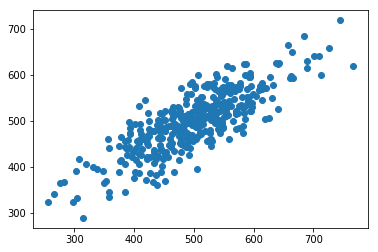

In [107]:
plt.scatter(y_train,y_pred)

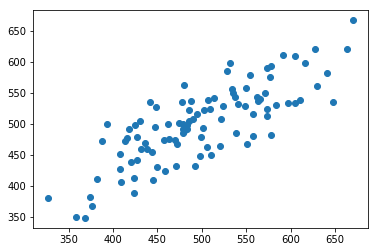

In [108]:
plt.scatter(y_test,y_pred1)